In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import numpy as np
import pandas as pd

In [3]:
filepath = '..//..//..//Documents//Test_sets//Testing_Sample//HI1509//Scale_25000//Edits//arrays500by500//arraymin.npy'

In [4]:
array = np.load(filepath)

#give nan values the value of the min - hog does not work with Nan
array[np.isnan(array)] = np.nanmin(array)

/anaconda/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


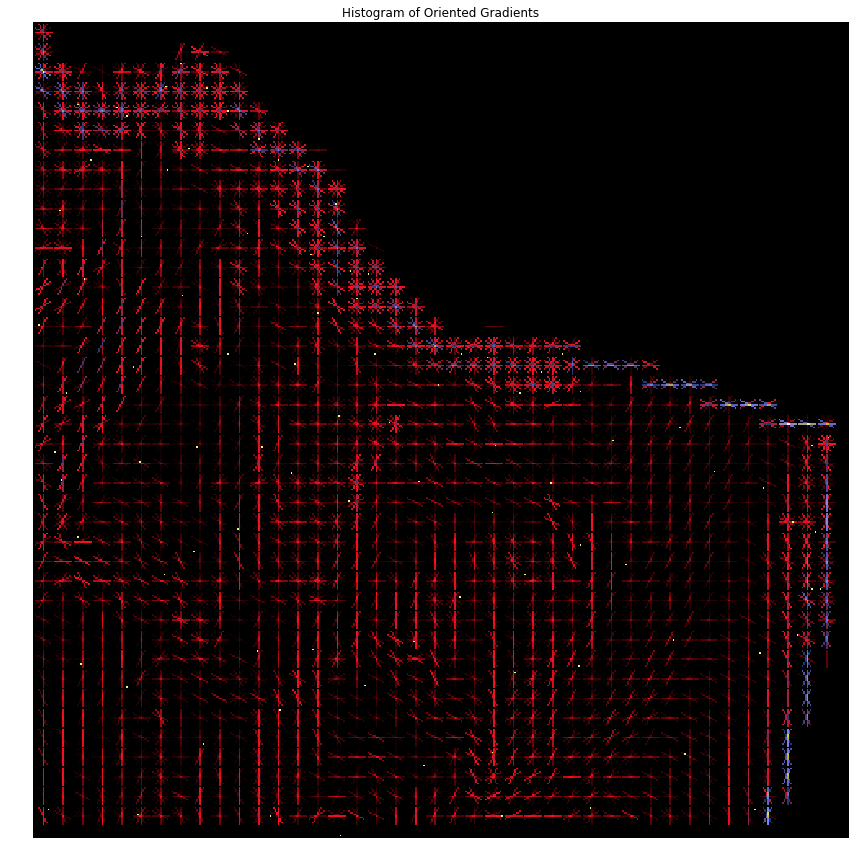

In [17]:
image = array

fd, hog_image = hog(image, orientations=6, pixels_per_cell=(12,12), cells_per_block=(1,1), visualise=True, feature_vector= False)

fig, (ax2) = plt.subplots(figsize=(15, 15))

arraySS = np.load('..//..//..//Documents//Test_sets//Testing_Sample//HI1509//Scale_25000//Edits//arrays500by500//arraySS.npy')
# xi = np.arange(0, 100)
# yi = np.arange(0, 100)
# X, Y = np.meshgrid(xi, yi)
# Z = arraySS[X,Y]

# ax1.axis('on')
# ax1.imshow(image, cmap=plt.cm.hot)
# ax1.set_title('Input image')
# ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 20))

import numpy.ma as ma
Zm = ma.masked_equal(arraySS, 0)

ax2.axis('off')
im1 = ax2.imshow(hog_image_rescaled, cmap=plt.cm.gist_stern)
im2 = ax2.imshow(Zm,cmap=plt.cm.Wistia)
ax2.set_title('Histogram of Oriented Gradients')
# ax1.set_adjustable('box-forced')
plt.show()

In [8]:
fd.shape

(100, 100, 1, 1, 4)

In [9]:
HOG_output = pd.DataFrame()
HOG_output

""


#HOG stored as 4D array - to access vector in the 4 directions need to index fd[0][0][0][1]
for i in range(0,19):
    for j in range(0,19):
        for a in range(0,2):
            for b in range(0,2):
                print (fd[i][j][a][b])

In [10]:
for i in range(0,100):
    for j in range(0,100):
        for a in range(0,1):
            for b in range(0,1):
                row = [i,j,(fd[i][j][a][b][0]),(fd[i][j][a][b][1]),(fd[i][j][a][b][2]),(fd[i][j][a][b][3])]
                HOG_output = HOG_output.append([row])
                print (fd[i][j][a][b])

In [11]:
HOG_output.columns = ['I', 'J','1','2','3','4']
HOG_output.head()

,I,J,1,2,3,4
0,0,0,0.137807,0.083662,0.487318,0.291201
0,0,1,0.598002,0.000000,0.321984,0.079968
0,0,2,0.000000,0.000000,0.000000,0.000000
0,0,3,0.000000,0.000000,0.000000,0.000000
0,0,4,0.000000,0.000000,0.000000,0.000000
